In [1]:
import numpy as np
import matplotlib.pyplot as plt

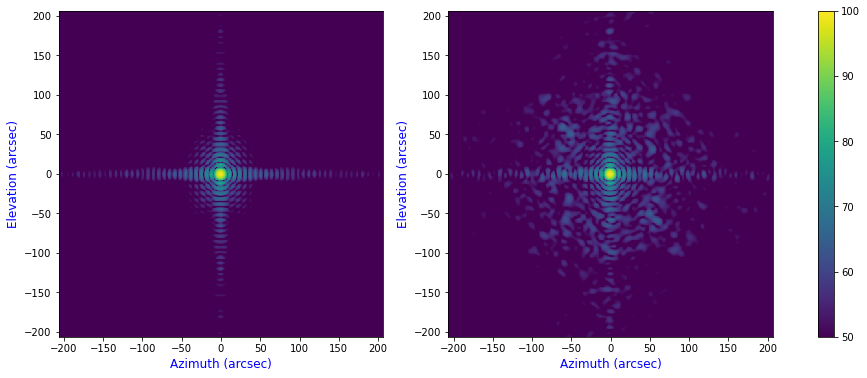

In [2]:
'''1. 400x400 arcsec map'''
x1,y1=np.meshgrid(np.linspace(-0.001,0.001,501)*180/np.pi*3600,np.linspace(-0.001,0.001,501)*180/np.pi*3600)
beam0=np.genfromtxt('SimulatedData1500GHz/perfect_1500GHz.txt',delimiter=',')
beam0=beam0[...,0]+1j*beam0[...,1]
beam0=beam0.reshape(501,-1)

beam1=np.genfromtxt('SimulatedData1500GHz/panel_error_effect1500GHz.txt',delimiter=',')
beam1=beam1[...,0]+1j*beam1[...,1];
beam1=beam1.reshape(501,-1)

#plots beam pattern
Cmap='viridis'#'jet','Oranges'#
vmax=100
vmin=50
fig,ax=plt.subplots(1,2,figsize=(16,6))
p1=ax[0].pcolor(x1,y1,np.log10(np.abs(beam0))*20,cmap=Cmap,vmin=vmin,vmax=vmax)
ax[0].axis('equal')
ax[0].set_xlabel('Azimuth (arcsec)',color='blue',fontsize=12);ax[0].set_ylabel('Elevation (arcsec)',color='blue',fontsize=12);
p2=ax[1].pcolor(x1,y1,np.log10(np.abs(beam1))*20,cmap=Cmap,vmin=vmin,vmax=vmax)
ax[1].axis('equal')
ax[1].set_xlabel('Azimuth (arcsec)',color='blue',fontsize=12);ax[1].set_ylabel('Elevation (arcsec)',color='blue',fontsize=12);
fig.colorbar(p1,ax=ax.ravel().tolist())
plt.savefig('perfect_Beam_distorted_beam.png')


In [3]:
'''1. Maximum gain of ideal telescope is 99.23dB'''
print('Simulated Frequency: 1.5THz')
print('Maximum gain:',(np.log10(np.abs(beam0))*20).max())
'''2. Gain loss caused by panel manufacture error'''
freq=1500*10**(9)
c=299792458;
Lambda=c/freq*1000000
print('gain loss:',np.log10(np.abs(beam1[250,250])/np.abs(beam0[250,250]))*20,'dB')
print('Equivalent rms of surface error:',np.sqrt(-np.log10(np.abs(beam1[250,250])/np.abs(beam0[250,250]))/np.log10(np.exp(1)))*Lambda/4/np.pi,
     'um')

Simulated Frequency: 1.5THz
Maximum gain: 99.23093100830515
gain loss: -0.16908066266667185 dB
Equivalent rms of surface error: 2.2190107031037836 um


In [4]:
'''Description of figure:'''
"""
Influence of the panel manufacture error on the FYST telescope's electromagnetic field is studied and simulated with 
Physical Optics (PO) analysis. Left is ideal beam of FYST with perfect mirrors. Right is the distorted beam caused by 
panel manufacture errors. Surface profile of the panels is measured by coordinate measuring machine. RMS of surface deviation
is 2.6um on Mirror 1 and 2.7um on Mirror2. Simulated gain loss is -0.17dB at 1.5THz, and the equivalent RMS of surface error 
is 2.2um.
"""

"\nInfluence of the panel manufacture error on the FYST telescope's electromagnetic field is studied and simulated with \nPhysical Optics (PO) analysis. Left is ideal beam of FYST with perfect mirrors. Right is the distorted beam caused by \npanel manufacture errors. Surface profile of the panels is measured by coordinate measuring machine. RMS of surface deviation\nis 2.6um on Mirror 1 and 2.7um on Mirror2. Simulated gain loss is -0.17dB at 1.5THz, and the equivalent RMS of surface error \nis 2.2um.\n"

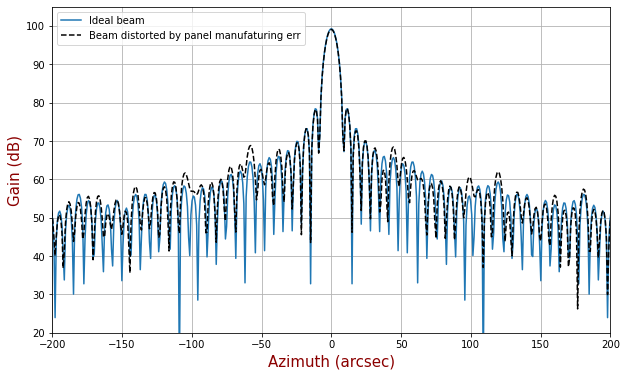

In [11]:
'''2, cutplot'''
fig=plt.figure(figsize=(10,6))
plt.plot(x1[250,...],20*np.log10(np.abs(beam0[250,...])),label='Ideal beam')
plt.plot(x1[250,...],20*np.log10(np.abs(beam1[250,...])),'k--',label='Beam distorted by panel manufaturing err')
plt.xlabel('Azimuth (arcsec)',size=15,color='darkred')
plt.ylabel('Gain (dB)',size=15,color='darkred')
plt.grid('both')
plt.xlim([-200,200])
plt.ylim([20,105])
plt.legend(loc='upper left')
plt.show()

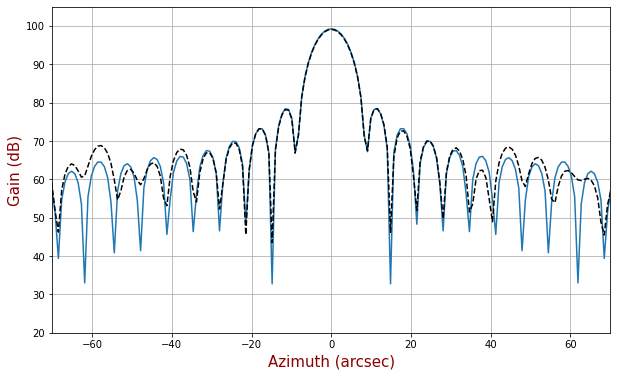

In [10]:
fig=plt.figure(figsize=(10,6))
plt.plot(x1[250,...],20*np.log10(np.abs(beam0[250,...])),label='Ideal beam')
plt.plot(x1[250,...],20*np.log10(np.abs(beam1[250,...])),'k--',label='Beam distorted by panel manufaturing err')
plt.xlabel('Azimuth (arcsec)',size=15,color='darkred')
plt.ylabel('Gain (dB)',size=15,color='darkred')
plt.grid('both')
plt.xlim([-70,70])
plt.ylim([20,105])
#plt.legend(loc='upper left')
plt.show()

In [16]:
test=20*np.log10(np.abs(beam0[250,...]))

In [17]:
np.where(test>=(test.max()-3))

(array([246, 247, 248, 249, 250, 251, 252, 253, 254], dtype=int64),)

In [20]:
test[246]-test.max()

-2.561027828271733

In [21]:
test[245]-test.max()

-4.117629701701006

In [22]:
x1[250,245]-x1[250,246]

-0.8250592249883608

In [23]:
x1[250,246]

-3.3002368999535774